In [89]:
from matplotlib import pyplot as plt
import pandas as pd

columns=['Position', 'Speed', 'Acceleration', 'Direction', 'Step Interval', 'Step Counter', 'Step Size', 'Time']

# Load .log file
with open('./arduino/putty-32-10vel.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    lines = lines[1:-1]

    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)



In [90]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

df.head()

,Position,Speed,Acceleration,Direction,Step Interval,Step Counter,Step Size,Time
0,30,2705.98,135299.20,1,369,31,369.55,21
1,107,5080.11,118706.17,1,196,108,196.85,44
2,199,6920.54,92021.46,1,144,200,144.50,67
3,287,8307.83,69364.43,1,120,288,120.37,90
4,377,9519.78,60597.76,1,105,378,105.04,113


In [91]:
df.tail()

,Position,Speed,Acceleration,Direction,Step Interval,Step Counter,Step Size,Time
132,0,0.0,0.0,0,0,0,2759.85,2987
133,0,0.0,0.0,0,0,0,2759.85,3009
134,0,0.0,0.0,0,0,0,2759.85,3031
135,0,0.0,0.0,0,0,0,2759.85,3053
136,0,0.0,0.0,0,0,0,2759.85,3075


In [92]:
df = df[:-3]
df.tail()

,Position,Speed,Acceleration,Direction,Step Interval,Step Counter,Step Size,Time
129,0,0.0,0.0,0,0,0,2759.85,2920
130,0,0.0,0.0,0,0,0,2759.85,2942
131,0,0.0,0.0,0,0,0,2759.85,2965
132,0,0.0,0.0,0,0,0,2759.85,2987
133,0,0.0,0.0,0,0,0,2759.85,3009


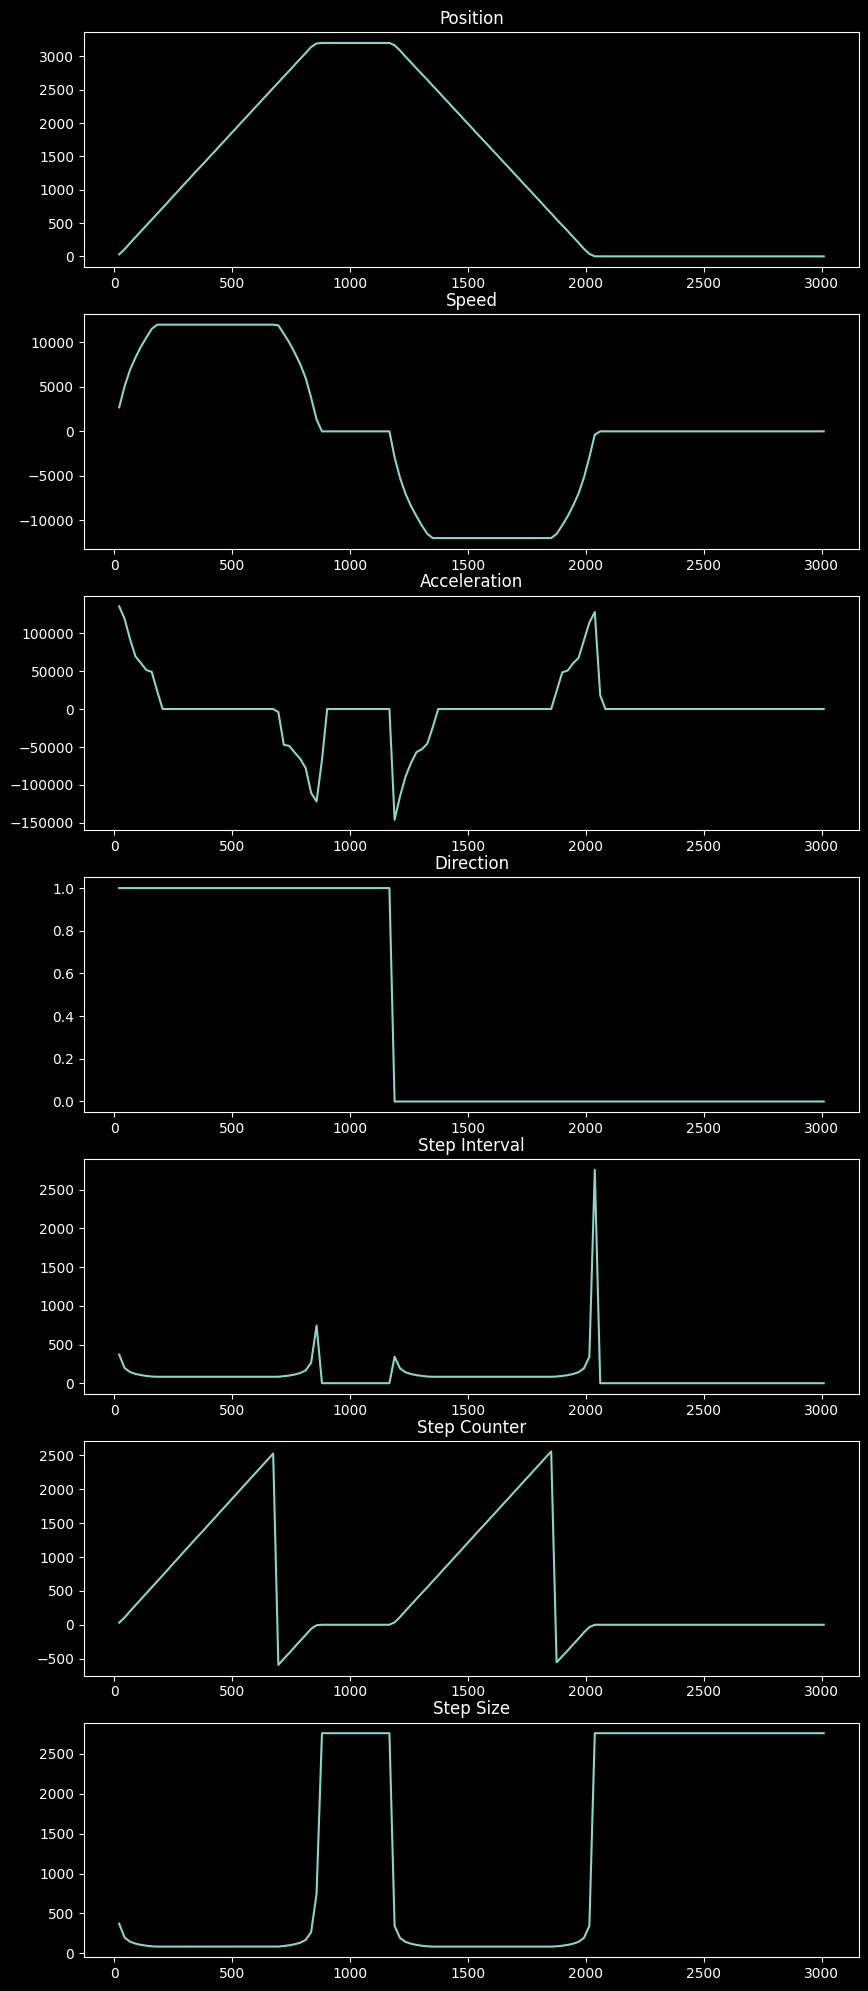

In [93]:
# Plot
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

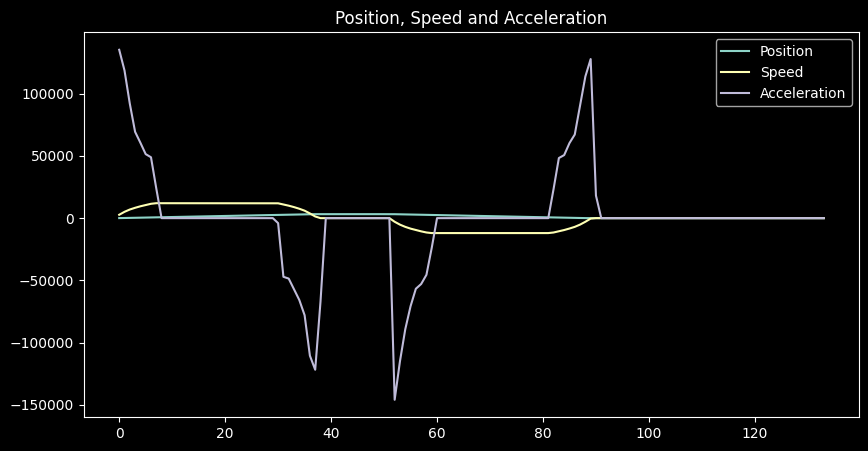

In [94]:
# On the same plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df['Position'].plot(ax=ax)
df['Speed'].plot(ax=ax)
df['Acceleration'].plot(ax=ax)

# Add legend and set title
ax.legend(['Position', 'Speed', 'Acceleration'])
ax.set_title('Position, Speed and Acceleration')

plt.show()